In [2]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imsave, imread
import matplotlib.pyplot as plt

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

(140, 710, 355)
(140, 710, 355)


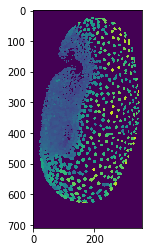

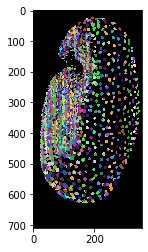

In [3]:
parametric_map = cle.push(imread("lund_parametric_map.tif"))
labels = cle.push(imread("lund_labels.tif"))

print(parametric_map.shape)
print(labels.shape)

cle.imshow(parametric_map)
cle.imshow(labels, labels=True)

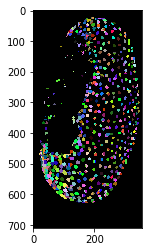

In [4]:
measurements = cle.read_intensities_from_map(labels, parametric_map)

threshold = 9

serosa_labels = cle.exclude_labels_with_values_out_of_range(measurements, labels, minimum_value_range=threshold)
cle.imshow(serosa_labels, labels=True)

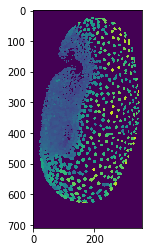

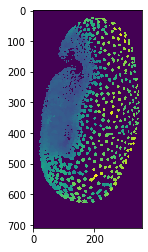

In [7]:
smoothed_parametric_map = cle.mean_of_n_nearest_neighbors_map(parametric_map, labels, n = 6)

cle.imshow(parametric_map)
cle.imshow(smoothed_parametric_map)

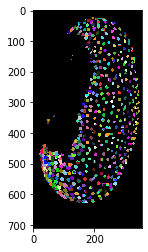

In [6]:
measurements = cle.read_intensities_from_map(labels, smoothed_parametric_map)

serosa_labels = cle.exclude_labels_with_values_out_of_range(measurements, labels, minimum_value_range=threshold)
cle.imshow(serosa_labels, labels=True)